**CS 418: Project 2**

**Authors:** Anusha Sagi, Fatima Kahack, Lydia Tse

**Description:** 
In this code, we will be utilizing regression, classification, and clustering to determine the party of a specified county

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error
import math

In [2]:
# Load Election dataset
data_election = pd.read_csv('merged_train.csv')
data_election.head()

State    County  FIPS  Total Population  \
0    AZ    apache  4001             72346   
1    AZ   cochise  4003            128177   
2    AZ  coconino  4005            138064   
3    AZ      gila  4007             53179   
4    AZ    graham  4009             37529   

   Percent White, not Hispanic or Latino  \
0                              18.571863   
1                              56.299492   
2                              54.619597   
3                              63.222325   
4                              51.461536   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.486551                    5.947806   
1                               3.714395                   34.403208   
2                               1.342855                   13.711033   
3                               0.552850                   18.548675   
4                               1.811932                   32.097844   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              1.719515       50.598513                 45.854643   
1             11.458374       49.069646                 37.902276   
2              4.825298       50.581614                 48.946141   
3              4.249798       50.296170                 32.238290   
4              4.385942       46.313518                 46.393456   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 13.322091                    32460           15.807433   
1                 19.756275                    45383            8.567108   
2                 10.873943                    51106            8.238305   
3                 26.397638                    40593           12.129932   
4                 12.315809                    47422           14.424104   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                             21.758252                            88.941063   
1                             13.409171                            76.837055   
2                             11.085381                            65.791439   
3                             15.729958                            82.262624   
4                             14.580797                            86.675944   

   Percent Rural  Democratic  Republican  Party  
0      74.061076       16298        7810      1  
1      36.301067       17383       26929      0  
2      31.466066       34240       19249      1  
3      41.062000        7643       12180      0  
4      46.437399        3368        6870      0

**TASK 1 - Partition in train and validation sets**

**Answer:**
We have partitioned the data into train and validation sets using the _Hold-Out Method_

In [3]:
x_train_full, x_validation_full, y_train, y_validation = train_test_split(data_election[['State', 'County', 'FIPS', 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Percent Rural', 'Democratic', 'Republican']], data_election['Party'], test_size = 0.25, random_state = 0)

**TASK 2 - Standardize the data**

In [4]:
# Selecting required variables for x_train
x_train = x_train_full.select_dtypes(include=[np.int64,np.float64])
x_train = x_train.iloc[:,1:14]

# Selecting required variables for x_validation
x_validation = x_validation_full.select_dtypes(include=[np.int64,np.float64])
x_validation = x_validation.iloc[:,1:14]

# Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_validation_scaled = scaler.transform(x_validation)
x_train_scaled_df = pd.DataFrame(x_train_scaled,index = x_train.index,columns=x_train.columns)
x_validation_scaled_df = pd.DataFrame(x_validation_scaled,index = x_validation.index,columns=x_validation.columns)

**TASK 3**

**Using various predictor variables to develop regression models either via linear regression or LASSO.**

**Task 3a - Regression to predict _Democratic_ values**

**Model 1** Linear Regression - _Including all variables_

In [5]:
# Create the linear regression model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['Democratic'])
print(fitted_model.coef_)

[ 69224.38708039  -3209.1591268   -1023.23488454  -6931.14708179
   3973.74580741    194.19056985  -5299.5676761   -1853.22320472
   1471.25963216   1467.0213699    4037.7699931  -10519.02638282
   -158.13004477]


In [6]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [7]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df.columns)
print(n)
print(p)
print(n-p-1)

299
13
285


In [8]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Democratic'])[1, 0]

R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Democratic']))
print('RMSE -',rmse)

R squared: 0.9338361960241593
Adjusted R squared: 0.9308181979480683
RMSE - 14771.9947930757


**Model 2** - Lasso Regression using all variables

In [9]:
# Generating model
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['Democratic'])
print(fitted_model.coef_)

[ 69224.71479124  -3195.33996565  -1013.63916087  -6917.77376216
   3975.00309549    192.59502461  -5290.27001162  -1846.83971098
   1471.58775101   1467.72300999   4030.09531822 -10515.05282676
   -155.56176752]


In [10]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [11]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_validation_scaled_df.columns)
n-p-1
print(n)
print(p)
print(n-p-1)

299
13
285


In [12]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Democratic'])[1, 0]

R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Democratic']))
print('RMSE: ',rmse)

R squared: 0.9338579590814098
Adjusted R squared: 0.9308409537061758
RMSE:  14768.885350551016


**Model 3.** Linear Regression - Includes 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'
as variables.

In [13]:
# Generating model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']], y = x_train_full['Democratic'])
print(fitted_model.coef_)

[ 70705.8786866   -2212.85847901   -131.80192434 -10178.54695173
   9916.88242758]


In [14]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']])

In [15]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

299
5
293


In [16]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Democratic'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Democratic']))
print('RMSE: ',rmse)

R squared: 0.9272983198666898
Adjusted R squared: 0.9260576768610018
RMSE:  14592.862156527432


**Model 4.** Linear Regression - Includes 'Total Population', 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'
as predictors.

****NOTE: This is our BEST MODEL for predicting _Democratic_ values****

In [17]:
# Generating model
model = linear_model.LinearRegression()
fitted_model_democratic = model.fit(X = x_train_scaled_df[['Total Population', 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']], y = x_train_full['Democratic'])
print(fitted_model_democratic.coef_)

[70692.75301251  1827.68857508 -9335.76053975]


In [18]:
# Predicting values
y_predicted = fitted_model_democratic.predict(x_validation_scaled_df[['Total Population', 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

In [19]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Total Population', 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

299
3
295


In [20]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Democratic'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Democratic']))
print('RMSE: ',rmse)

R squared: 0.9505061106430135
Adjusted R squared: 0.9500027829546374
RMSE:  12456.89252865588


**Task 3b - Regression to predict _Republican_ values**

**Model 1.** Linear Regression including all variables

In [21]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['Republican'])
print(fitted_model.coef_)

[45467.5097118   1769.95034533 -3141.4206375   1167.17323402
 -6463.65917143 -1121.73432851  -955.67013341  2580.74056065
  5910.97457236  2037.10575397  3530.42010898 -3156.11275644
 -5992.05181735]


In [22]:
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [23]:
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df.columns)
print(n)
print(p)
print(n-p-1)

299
13
285


In [24]:
corr_coef = np.corrcoef(y_predicted,x_validation_full['Republican'])[1, 0]

R_squared = corr_coef ** 2
print("R sqaured:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Republican']))
print('RMSE: ',rmse)

R sqaured: 0.7239014362949739
Adjusted R squared: 0.7113074667224639
RMSE:  15962.4313106021


**Model 2.** LASSO Regression that includes all variables

In [25]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['Republican'])
print(fitted_model.coef_)

[45464.11625996  1763.84615535 -3141.51363944  1160.39910811
 -6454.91877737 -1119.19972956  -956.20034133  2577.09105238
  5906.62715265  2034.44712921  3523.56962737 -3151.08771664
 -5989.09353181]


In [26]:
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [27]:
n = len(x_validation_scaled_df.index)
p = len(x_validation_scaled_df.columns)
n-p-1
print(n)
print(p)
print(n-p-1)

299
13
285


In [28]:
corr_coef = np.corrcoef(y_predicted,x_validation_full['Republican'])[1, 0]

R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Republican']))
print('RMSE: ',rmse)

R squared: 0.7238886663016905
Adjusted R squared: 0.7112941142382588
RMSE:  15962.567869419843


**Model 3.** Linear Regression using 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'
as predictors.

In [29]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']], y = x_train_full['Republican'])
print(fitted_model.coef_)

[46801.58031155  2411.56062758 -1926.15808714    98.71008908
  -478.25725257]


In [30]:
y_predicted = fitted_model.predict(x_validation_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']])

In [31]:
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

299
5
293


In [32]:
corr_coef = np.corrcoef(y_predicted,x_validation_full['Republican'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Republican']))
print('RMSE: ',rmse)

R squared: 0.6704238187062499
Adjusted R squared: 0.6647996517899744
RMSE:  17111.714193417978


**Model 4.** Linear Regression including 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 65 and Older', 'Percent Unemployed', 'Median Household Income', 'Percent Rural' as predictor variables

**NOTE: This is our BEST MODEL for predicting _Republican_ party values**

In [33]:
model = linear_model.LinearRegression()
fitted_model_republican = model.fit(X = x_train_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 65 and Older', 'Percent Unemployed', 'Median Household Income', 'Percent Rural']], y = x_train_full['Republican'])
print(fitted_model_republican.coef_)

[45133.5738712   4612.72460625  3998.62967731 -4790.68208843
  2692.84982155  2174.86528205  6130.35899569 -5297.8335129 ]


In [34]:
y_predicted = fitted_model_republican.predict(x_validation_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 65 and Older', 'Percent Unemployed', 'Median Household Income', 'Percent Rural']])

In [35]:
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 65 and Older', 'Percent Unemployed', 'Median Household Income', 'Percent Rural']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

299
8
290


In [36]:
corr_coef = np.corrcoef(y_predicted,x_validation_full['Republican'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Republican']))
print('RMSE: ',rmse)

R squared: 0.7302080671531
Adjusted R squared: 0.7227655310745649
RMSE:  15749.245925443494


**TASK 4**

**Building a Classification Model**

**4a. Decision Tree Classifier**

**Model 1.** Predicts each county as either Democratic or Republican using _all variables_ and _entropy_

In [37]:
classifier = DecisionTreeClassifier(criterion = "entropy", splitter="best", min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
classifier.fit(x_train_scaled_df, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [38]:
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 100, 11, -0.08037002, 0.85103407, 896, 896.)
 (  2,   7, 12, -1.57463121, 0.99675236, 328, 328.)
 (  3,   4,  1,  0.13988956, 0.28290479,  61,  61.)
 ( -1,  -1, -2, -2.        , 0.        ,  57,  57.)
 (  5,   6, 11, -2.27329141, 0.81127812,   4,   4.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.        , 0.        ,   3,   3.)
 (  8,  15,  0, -0.34515437, 0.98895258, 267, 267.)
 (  9,  10, 11, -0.18558561, 0.30337484,  37,  37.)
 ( -1,  -1, -2, -2.        , 0.        ,  29,  29.)
 ( 11,  12,  9, -0.91212842, 0.81127812,   8,   8.)
 ( -1,  -1, -2, -2.        , 0.        ,   5,   5.)
 ( 13,  14,  5,  0.40603571, 0.91829583,   3,   3.)
 ( -1,  -1, -2, -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 ( 16,  17,  1, -1.39712286, 1.        , 230, 230.)
 ( -1,  -1, -2, -2.        , 0.        ,  10,  10.)
 ( 18,  99, 10,  0.07734165, 0.9985091 , 220, 220.)
 ( 19,  42,  4, -0.37913467, 0.99998349, 209, 209.)
 ( 20,  25, 

197

In [39]:
y_pred = classifier.predict(x_validation_scaled_df)

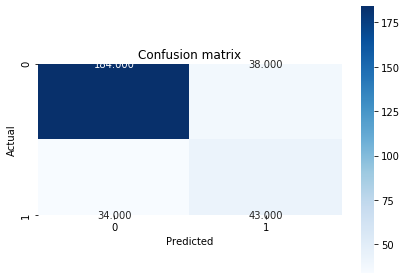

In [40]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [41]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7591973244147158, 0.24080267558528423, array([0.8440367, 0.5308642]), array([0.82882883, 0.55844156]), array([0.83636364, 0.5443038 ])]


**Model 2.** Predicts each county as either Democratic or Republican using _all variables_ and _gini index_

In [42]:
classifier = DecisionTreeClassifier(criterion = "gini", splitter="best", min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
classifier.fit(x_train_scaled_df, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1,  66, 11, -0.56057394, 0.40035077, 896, 896.)
 (  2,   7, 12, -1.57463121, 0.46602727, 211, 211.)
 (  3,   4,  1,  0.13199214, 0.07262371,  53,  53.)
 ( -1,  -1, -2, -2.        , 0.        ,  50,  50.)
 (  5,   6, 10, -0.75041622, 0.44444444,   3,   3.)
 ( -1,  -1, -2, -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 (  8,  21,  4, -0.37756465, 0.49927896, 158, 158.)
 (  9,  20,  6,  0.9269689 , 0.34179688,  32,  32.)
 ( 10,  15,  5,  0.08567018, 0.27777778,  30,  30.)
 ( 11,  12,  9, -0.99918535, 0.48      ,  10,  10.)
 ( -1,  -1, -2, -2.        , 0.        ,   5,   5.)
 ( 13,  14,  0, -0.3478808 , 0.32      ,   5,   5.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.        , 0.        ,   4,   4.)
 ( 16,  17,  7,  1.6322031 , 0.095     ,  20,  20.)
 ( -1,  -1, -2, -2.        , 0.        ,  17,  17.)
 ( 18,  19, 10, -0.77914186, 0.44444444,   3,   3.)
 ( -1,  -1, -2, -2.        , 0.        ,   1,   1.)
 ( -1,  -1, 

231

In [44]:
y_pred = classifier.predict(x_validation_scaled_df)

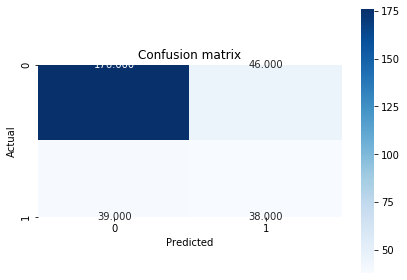

In [45]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [46]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7157190635451505, 0.28428093645484953, array([0.81860465, 0.45238095]), array([0.79279279, 0.49350649]), array([0.80549199, 0.47204969])]


**Model 3.** Predicts each county as Democratic or Republican via the variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'

**NOTE: This is the BEST classifier model**

In [47]:
classifier_party = DecisionTreeClassifier(criterion = "entropy", splitter="best", min_weight_fraction_leaf=0.0, max_features=None, random_state=0, min_samples_leaf=2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
classifier_party.fit(x_train_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [48]:
# Show the structure of the decision tree classifier
print(classifier_party.tree_.__getstate__()['nodes'])
len(classifier_party.tree_.__getstate__()['nodes'])

[(  1, 134,  3, -0.08037002, 0.85103407, 896, 896.)
 (  2,   3,  0, -1.39712286, 0.99675236, 328, 328.)
 ( -1,  -1, -2, -2.        , 0.        ,  36,  36.)
 (  4,  57,  3, -0.9321757 , 0.99834117, 292, 292.)
 (  5,  26,  0,  0.14515513, 0.90688017, 121, 121.)
 (  6,  15,  2,  0.135652  , 0.66319684,  58,  58.)
 (  7,   8,  3, -1.63488019, 0.29747225,  38,  38.)
 ( -1,  -1, -2, -2.        , 0.        ,  23,  23.)
 (  9,  10,  1,  0.79554036, 0.56650951,  15,  15.)
 ( -1,  -1, -2, -2.        , 0.        ,   8,   8.)
 ( 11,  14,  0, -0.07996122, 0.86312057,   7,   7.)
 ( 12,  13,  1,  1.77366126, 1.        ,   4,   4.)
 ( -1,  -1, -2, -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2, -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2, -2.        , 0.        ,   3,   3.)
 ( 16,  17,  1, -0.29885851, 0.97095059,  20,  20.)
 ( -1,  -1, -2, -2.        , 0.        ,   3,   3.)
 ( 18,  25,  1,  0.49151306, 0.87398105,  17,  17.)
 ( 19,  20,  1, -0.05425084, 0.97986876,  12,  12.)
 ( -1,  -1, 

263

In [49]:
y_pred = classifier_party.predict(x_validation_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

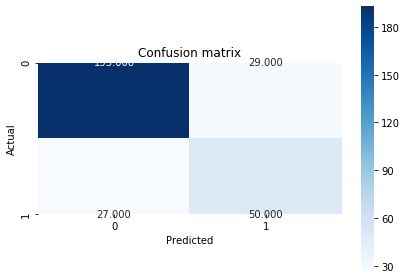

In [50]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [51]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8127090301003345, 0.18729096989966554, array([0.87727273, 0.63291139]), array([0.86936937, 0.64935065]), array([0.87330317, 0.64102564])]


**Model 4.** Predictions using gini index and variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'

In [52]:
classifier = DecisionTreeClassifier(criterion = "gini", splitter="best", min_weight_fraction_leaf=0.0, max_features=None, random_state=0, min_samples_leaf=2, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
classifier.fit(x_train_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [53]:
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1,  84,  3, -0.56057394, 0.40035077, 896, 896.)
 (  2,  13,  0, -0.55090189, 0.46602727, 211, 211.)
 (  3,   4,  0, -1.24638557, 0.1723356 ,  63,  63.)
 ( -1,  -1, -2, -2.        , 0.        ,  33,  33.)
 (  5,  10,  2,  0.90451238, 0.32      ,  30,  30.)
 (  6,   9,  3, -2.22614324, 0.1472    ,  25,  25.)
 (  7,   8,  2,  0.30470251, 0.40816327,   7,   7.)
 ( -1,  -1, -2, -2.        , 0.        ,   4,   4.)
 ( -1,  -1, -2, -2.        , 0.44444444,   3,   3.)
 ( -1,  -1, -2, -2.        , 0.        ,  18,  18.)
 ( 11,  12,  1,  0.02679734, 0.32      ,   5,   5.)
 ( -1,  -1, -2, -2.        , 0.5       ,   2,   2.)
 ( -1,  -1, -2, -2.        , 0.        ,   3,   3.)
 ( 14,  29,  3, -1.85677475, 0.49963477, 148, 148.)
 ( 15,  16,  0,  0.21986136, 0.33240997,  38,  38.)
 ( -1,  -1, -2, -2.        , 0.        ,  14,  14.)
 ( 17,  18,  3, -2.98789024, 0.44444444,  24,  24.)
 ( -1,  -1, -2, -2.        , 0.        ,   3,   3.)
 ( 19,  24,  2, -0.48755288, 0.36281179,  21,  21.)
 ( 20,  21, 

253

In [54]:
y_pred = classifier.predict(x_validation_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

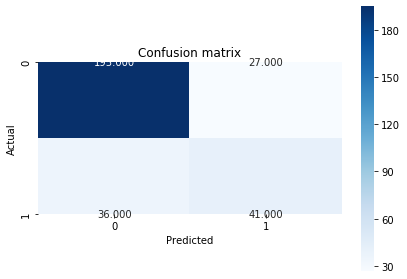

In [55]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [56]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7892976588628763, 0.21070234113712372, array([0.84415584, 0.60294118]), array([0.87837838, 0.53246753]), array([0.86092715, 0.56551724])]


**4b. K-Nearest Neighbours** Using KNN to predict political party

**Model 1.** KNN using all variables with k = 3

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scaled_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [58]:
y_pred = classifier.predict(x_validation_scaled_df)

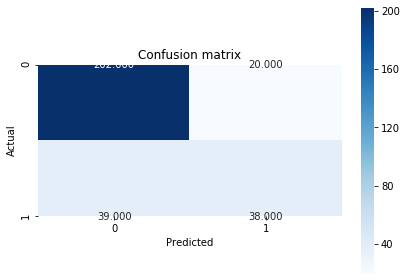

In [59]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [60]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.802675585284281, 0.19732441471571904, array([0.83817427, 0.65517241]), array([0.90990991, 0.49350649]), array([0.87257019, 0.56296296])]


**Model 2.** KNN with k = 3 and the variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'

In [61]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
y_pred = classifier.predict(x_validation_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

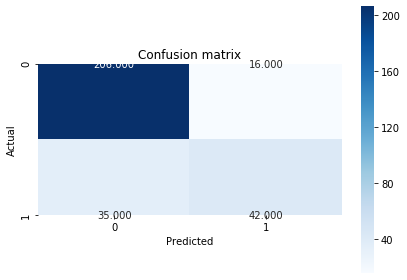

In [63]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [64]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8294314381270903, 0.1705685618729097, array([0.85477178, 0.72413793]), array([0.92792793, 0.54545455]), array([0.88984881, 0.62222222])]


**4c. Support Vector Machines** Using SVM to predict whether a county is Democratic or Republican

**Model 1.** SVM using all variables

In [65]:
classifier = SVC(kernel = 'rbf')  
classifier.fit(x_train_scaled_df, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
y_pred = classifier.predict(x_validation_scaled_df)

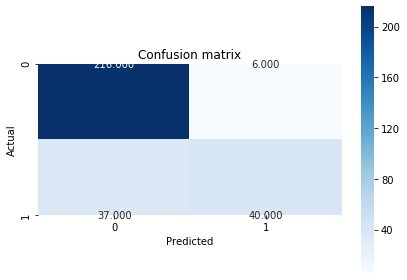

In [67]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [68]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85375494, 0.86956522]), array([0.97297297, 0.51948052]), array([0.90947368, 0.6504065 ])]


**Model 2.** SVM with 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree' as predictor variables

In [69]:
classifier = SVC(kernel = 'rbf')  
classifier.fit(x_train_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']], y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
y_pred = classifier.predict(x_validation_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

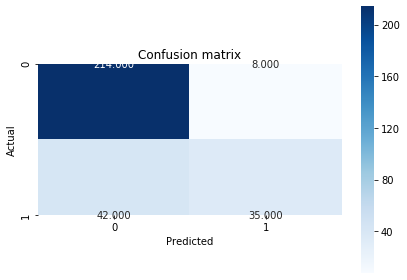

In [71]:
conf_matrix = metrics.confusion_matrix(y_validation, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [72]:
accuracy = metrics.accuracy_score(y_validation, y_pred)
error = 1 - metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, average = None)
recall = metrics.recall_score(y_validation, y_pred, average = None)
F1_score = metrics.f1_score(y_validation, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8327759197324415, 0.16722408026755853, array([0.8359375 , 0.81395349]), array([0.96396396, 0.45454545]), array([0.89539749, 0.58333333])]


**TASK 5** 

**Creating clustering models using various clustering methods**

In [73]:
# Grab Data that we will work with 
X = data_election[['FIPS', 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Percent Rural', 'Party']]
Y = data_election['Party']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
X_standardized = scaler.transform(X)

**5a. Hierarchical Clustering with the Single Linkage Method** 

Clustering performed using variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'

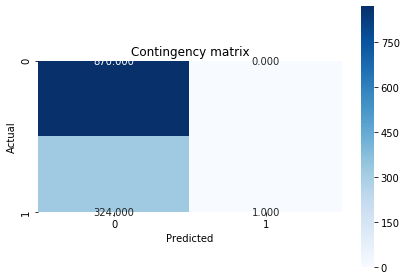

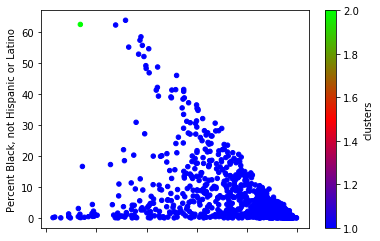

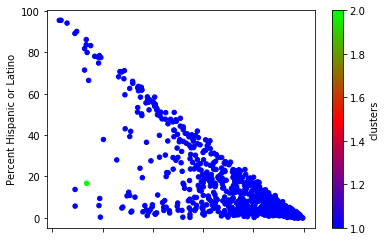

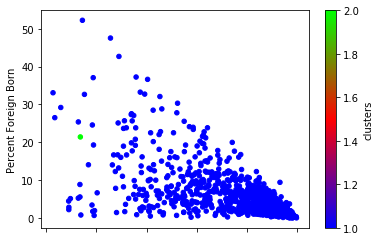

In [74]:
#Task 5a - Model hierarchical clustering with single linkage method
  #5a.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'
scaler = StandardScaler()
scaler.fit(data_election[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']])
x = scaler.transform(data_election[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']])

clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters 
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)

In [75]:
# Evaluation Calculations for hierarchical clustering with single linkage method
adjusted_rand_index = metrics.adjusted_rand_score(Y, data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.0028041107323011935  Silhouette coefficient:  0.6967676709484538


**5b. Hierarchical Clustering with Single Linkage Method**

Clustering uses variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older'

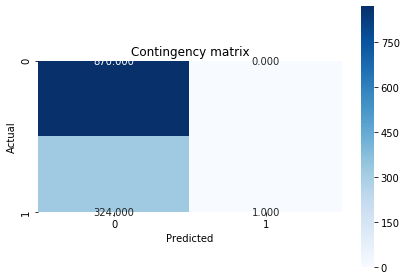

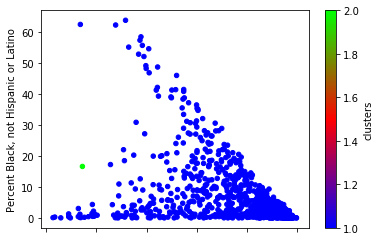

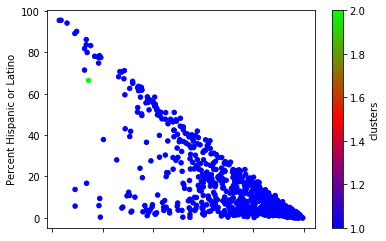

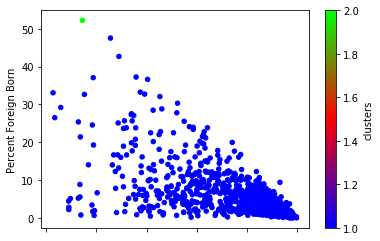

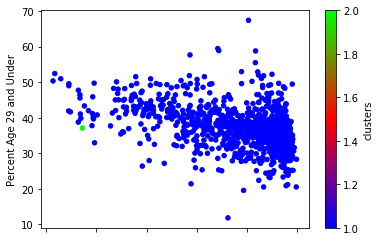

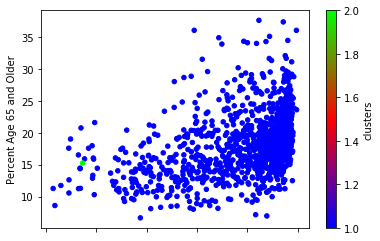

In [76]:
#Task 5b - Model hierarchical clustering with single linkage method
  #5b.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
  #            'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older'
scaler = StandardScaler()
scaler.fit(data_election[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older']])
x = scaler.transform(data_election[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older']])


clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters 

ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 65 and Older', c = 'clusters', colormap = plt.cm.brg)

In [77]:
# Evaluation calculations for this model 
adjusted_rand_index = metrics.adjusted_rand_score(Y, data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.0028041107323011935  Silhouette coefficient:  0.670572365919519


**5c. Hierarchical Clustering with Single Linkage Method**

Clustering uses variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female'

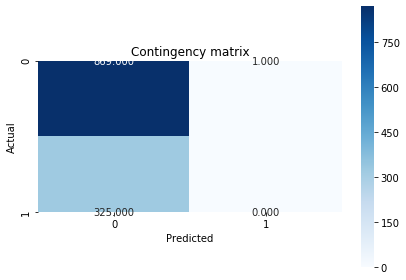

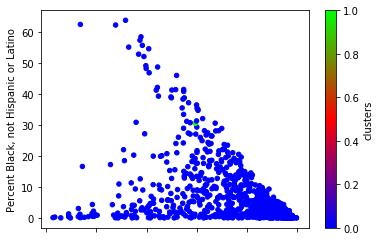

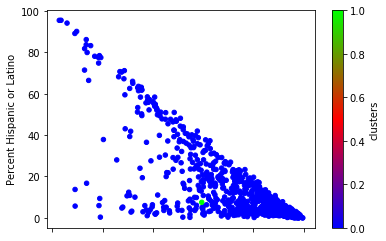

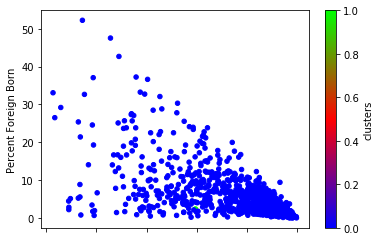

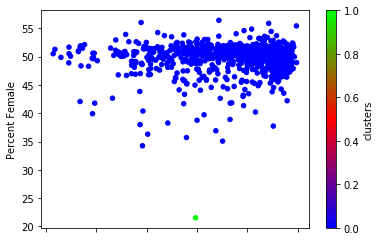

In [78]:
#Task 5c - Model hierarchical clustering with single linkage method
  #5c.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
  #            'Percent Foreign Born', 'Percent Female'
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female']])

clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Female', c = 'clusters', colormap = plt.cm.brg)

In [79]:
# Evaluation calculations for this model 
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  -0.001047512629882871  Silhouette coefficient:  0.7946287431336253


**5d. Hierarchical Clustering with Single Linkage Method**

Clustering uses variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree'

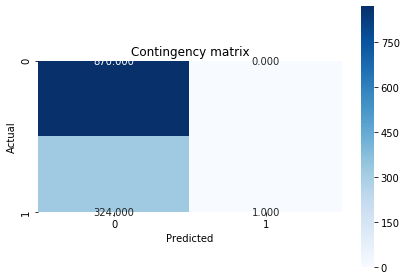

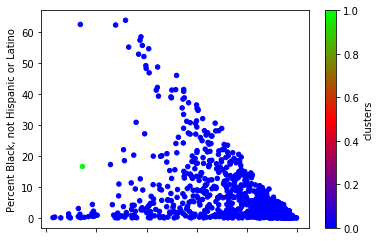

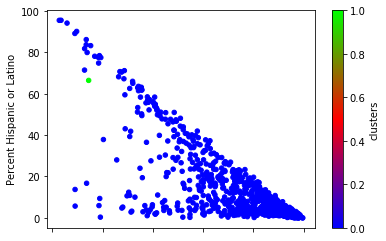

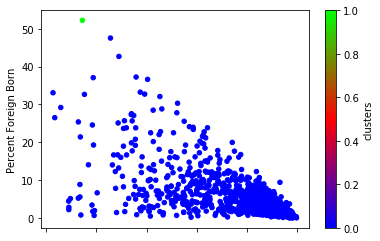

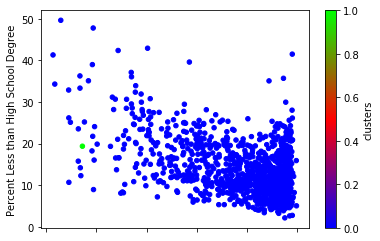

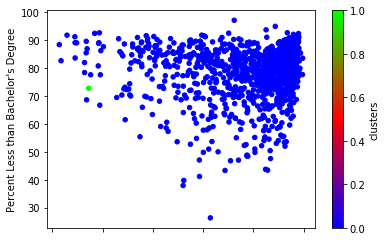

In [80]:
#Task 5d - Model hierarchical clustering with single linkage method
  #5d.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
  #            'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree'
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])


clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters -1

ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)

In [81]:
# Evaluation calculations for this model 
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.0028041107323011935  Silhouette coefficient:  0.6752810905295151


**5e. Hierarchical Clustering with Single Linkage Method**

Clustering uses variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree'

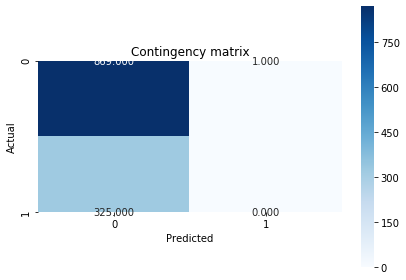

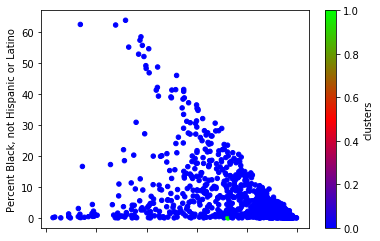

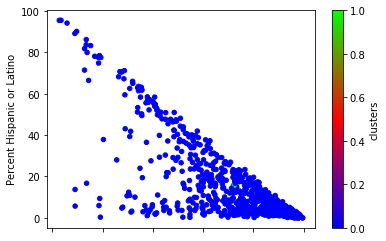

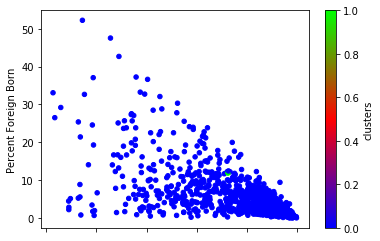

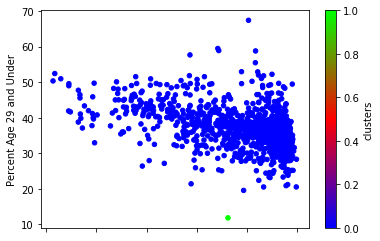

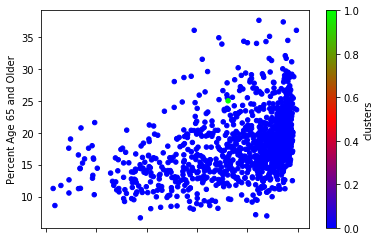

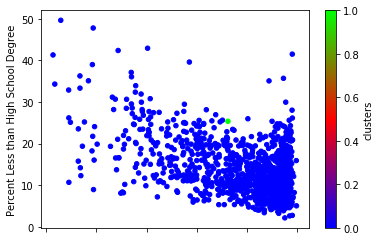

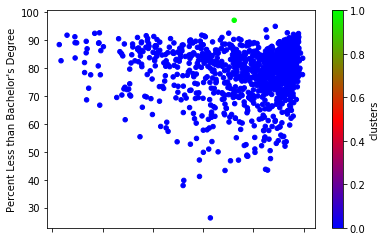

In [82]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older','Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older','Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])


clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 65 and Older', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)

In [83]:
# Evaluation calculations this model 
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  -0.001047512629882871  Silhouette coefficient:  0.4218980441370412


**5f. Hierarchical Clustering with Single Linkage Method**

Clustering uses variables 'Percent Age 65 and Older','Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree'

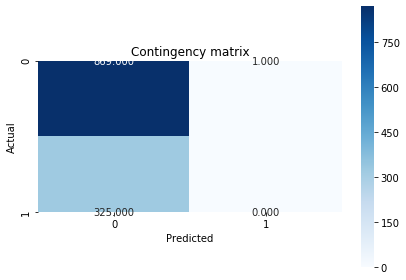

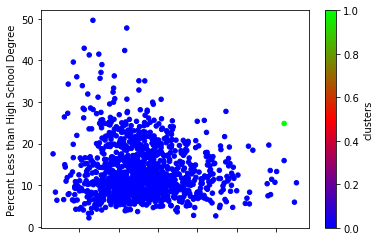

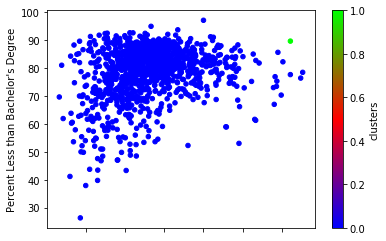

In [84]:
scaler = StandardScaler()
scaler.fit(X[['Percent Age 65 and Older','Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])
x = scaler.transform(X[['Percent Age 65 and Older','Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree' ]])


clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent Age 65 and Older', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent Age 65 and Older', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)

In [85]:
# Evaluation calculations for this model 
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  -0.001047512629882871  Silhouette coefficient:  0.5061973365950125


**5g. Hierarchical Clustering with Single Linkage Method**

Clustering uses variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree'

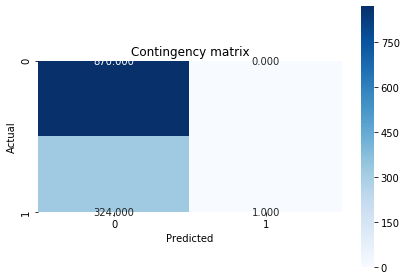

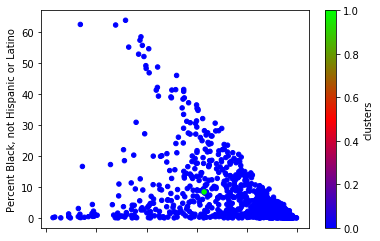

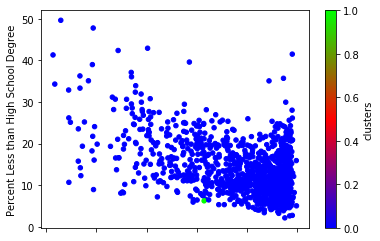

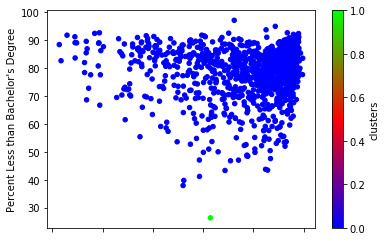

In [86]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])


clustering = linkage(x, method= 'single', metric = "euclidean") 
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using hierarchical clustering with single linkage method
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)


In [87]:
# Evaluation calculations for this model 
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.0028041107323011935  Silhouette coefficient:  0.5846363456702045


In [88]:
#************************************************END OF hierarchical clustering with single linkage method*******************************************

**5h. K-Means Clustering**

Clustering using variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'

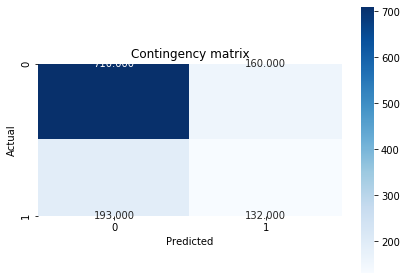

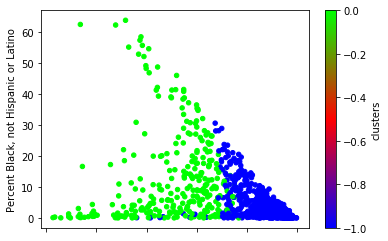

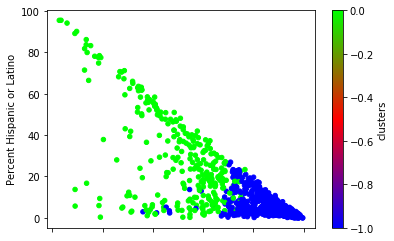

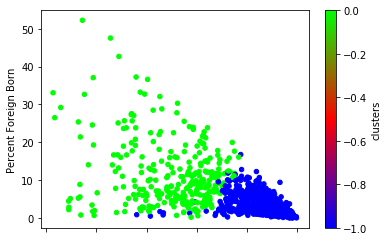

In [89]:
#Task 5h - Model KMeans Clustering 
  #5h.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 
  #                 'Percent Hispanic or Latino', 'Percent Foreign Born'
x = X_standardized[:,2:6]

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)

In [90]:
#Task 5h.ii - Evaluation Calculations for hierarchical clustering with single linkage method
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.11911877926404817  Silhouette coefficient:  0.5818101112791731


**5i. K-Means Clustering**

Clustering using variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older'

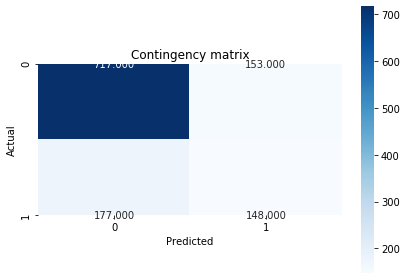

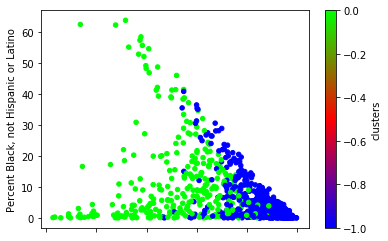

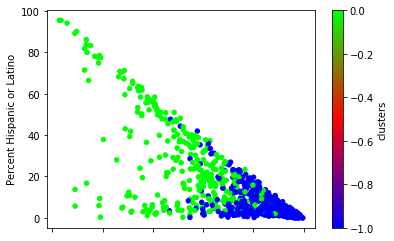

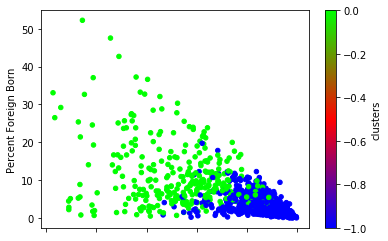

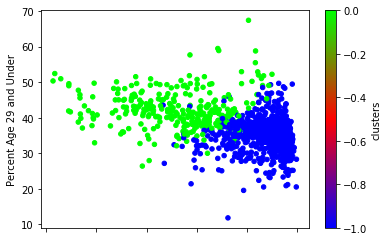

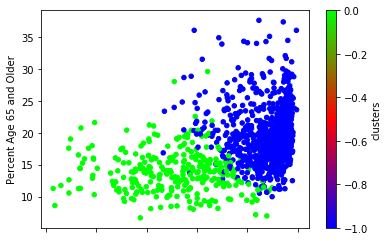

In [91]:
#Task 5i - Model KMeans Clustering 
  #5i.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
  #            'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older'
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 29 and Under', 'Percent Age 65 and Older']])

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 65 and Older', c = 'clusters', colormap = plt.cm.brg)

In [92]:
#Task 5i.ii - Evaluation Calculations for model
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters-1)
silhouette_coefficient = metrics.silhouette_score(X_standardized, clusters-1, metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.15682610655732362  Silhouette coefficient:  0.2906553943228404


**5j. K-Means Clustering**

Clustering using variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
'Percent Foreign Born', 'Percent Female'

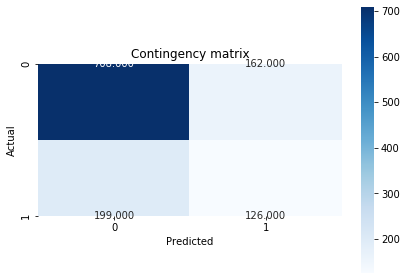

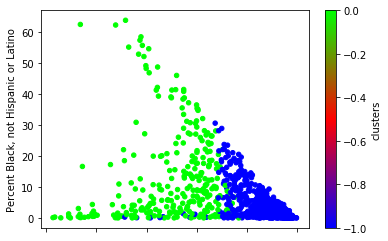

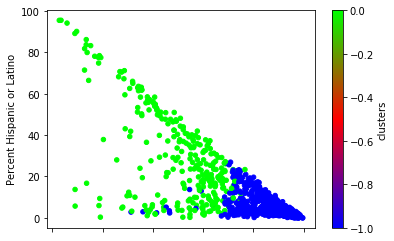

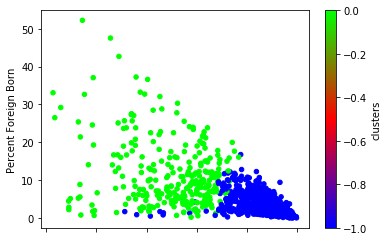

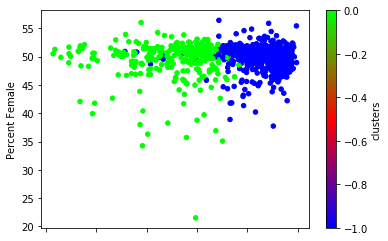

In [93]:
#Task 5j - Model KMeans Clustering 
#5j.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
  #            'Percent Foreign Born', 'Percent Female'
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female']])

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Female', c = 'clusters', colormap = plt.cm.brg)

In [94]:
#Task 5j.ii - Evaluation Calculations for model
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.10636374173342371  Silhouette coefficient:  0.5223223037625178


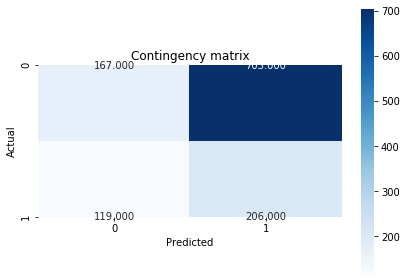

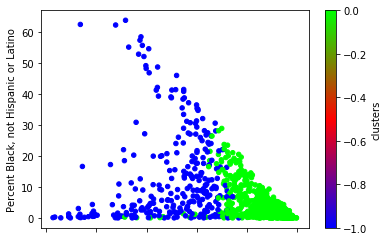

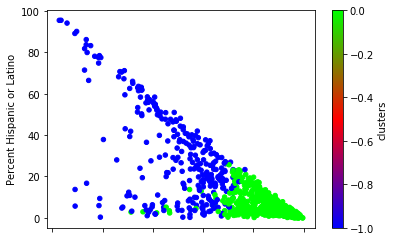

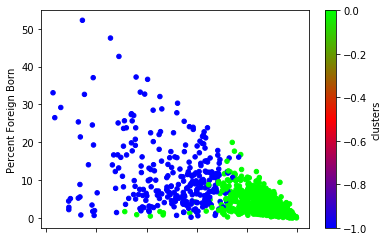

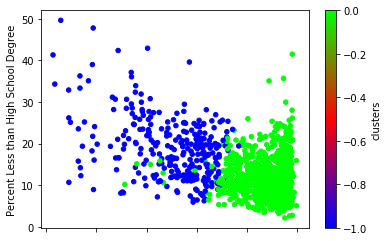

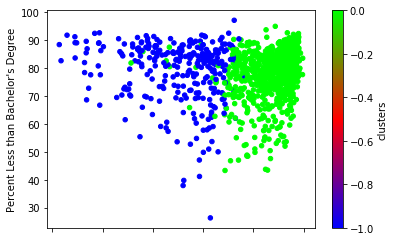

In [95]:
#Task 5k - Model KMeans Clustering 
  #5k.i variables - 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 
  #            'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree'
scaler = StandardScaler()
scaler.fit(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])
x = scaler.transform(X[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1

ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)

In [96]:
#Task 5k.ii - Evaluation Calculations for model
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.08924775988883304  Silhouette coefficient:  0.4635101311098164


**5l. K-Means Clustering**

Clustering using variables 'Percent Age 29 and Under', 'Percent Age 65 and Older'

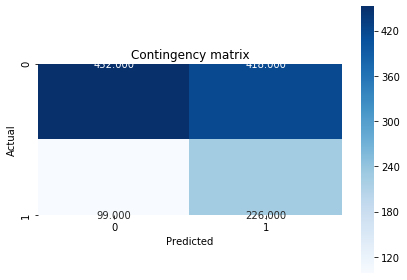

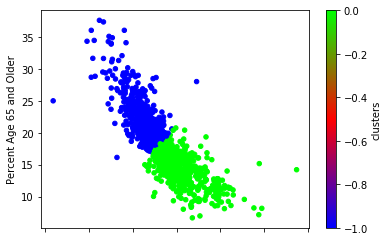

In [97]:
#Task 5l - Model KMeans Clustering 
  #5l.i variables - 'Percent Age 29 and Under', 'Percent Age 65 and Older'
scaler = StandardScaler()
scaler.fit(X[['Percent Age 29 and Under', 'Percent Age 65 and Older']])
x = scaler.transform(X[['Percent Age 29 and Under', 'Percent Age 65 and Older']])

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent Age 29 and Under', y = 'Percent Age 65 and Older', c = 'clusters', colormap = plt.cm.brg)

In [98]:
#Task 5l.ii - Evaluation Calculations for model
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.016263794172611586  Silhouette coefficient:  0.4621003253492598


**5m. K-Means Clustering**

Clustering using variables 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'

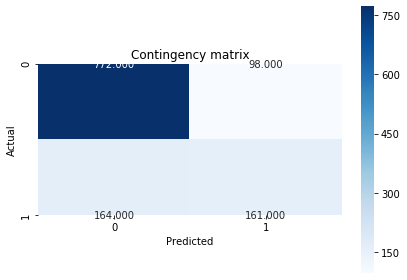

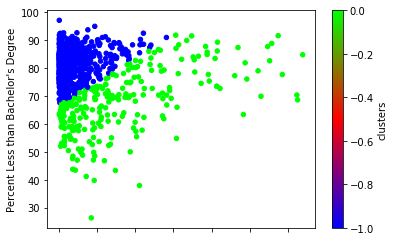

In [99]:
#Task 5m - Model KMeans Clustering 
  #5m.i variables - 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'
scaler = StandardScaler()
scaler.fit(X[['Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])
x = scaler.transform(X[['Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)

In [100]:
#Task 5m.ii - Evaluation Calculations for model
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.26595586689147394  Silhouette coefficient:  0.5445444266793265


**5n. K-Means Clustering**

Clustering using variables 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'

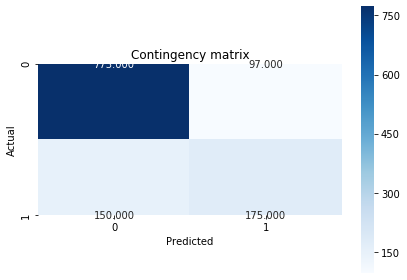

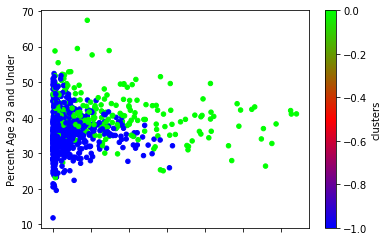

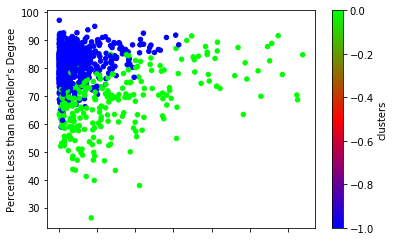

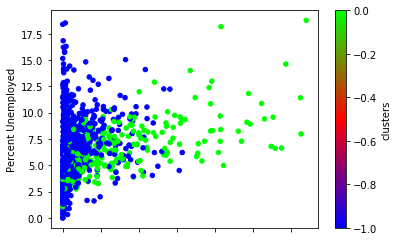

In [101]:
#Task 5n - Model KMeans Clustering 
  #5n.i variables - 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree'
scaler = StandardScaler()
scaler.fit(X[['Percent Black, not Hispanic or Latino', 'Percent Age 29 and Under','Percent Less than Bachelor\'s Degree', 'Percent Unemployed']])
x = scaler.transform(X[['Percent Black, not Hispanic or Latino','Percent Age 29 and Under','Percent Less than Bachelor\'s Degree', 'Percent Unemployed']])

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(x)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters-1)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# Plot clusters found using KMeans clustering of 2 clusters
data_election['clusters'] = clusters -1
ax = data_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'clusters', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent Black, not Hispanic or Latino', y = 'Percent Unemployed', c = 'clusters', colormap = plt.cm.brg)

In [102]:
#Task 5n.ii - Evaluation Calculations for model
adjusted_rand_index = metrics.adjusted_rand_score(data_election['Party'], data_election['clusters'])
silhouette_coefficient = metrics.silhouette_score(x, data_election['clusters'], metric = "euclidean")
print("adjusted Rand index: ", adjusted_rand_index, " Silhouette coefficient: ", silhouette_coefficient)

adjusted Rand index:  0.30061428945310187  Silhouette coefficient:  0.3250057188451443


**5o. Finding True Clusters**

Silhouette coefficient:  0.21427376755203847


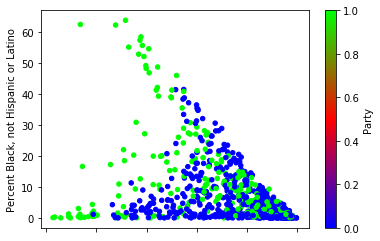

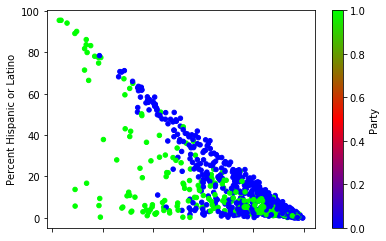

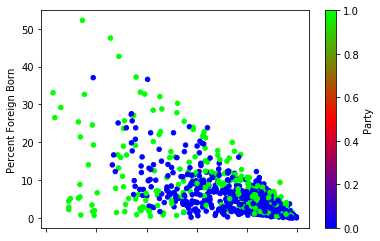

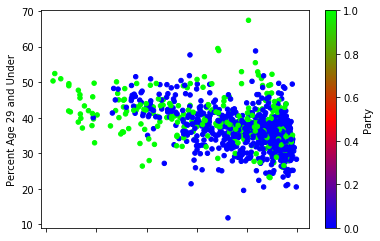

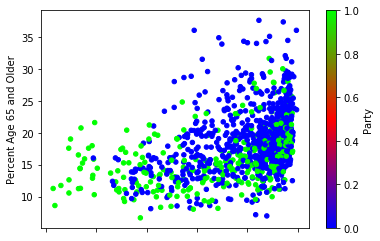

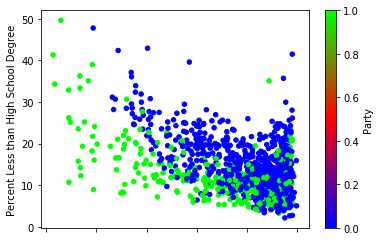

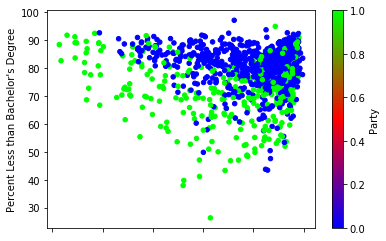

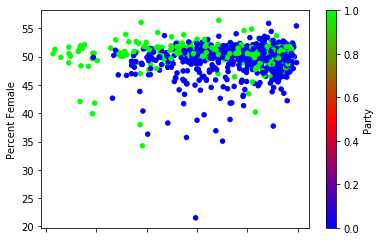

In [103]:
# Plot true clusters for the predictor, which is the party for each county
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Black, not Hispanic or Latino', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Hispanic or Latino', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Foreign Born', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 29 and Under', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Age 65 and Older', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than High School Degree', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Less than Bachelor\'s Degree', c = 'Party', colormap = plt.cm.brg)
ax = data_election.plot(kind = 'scatter', x = 'Percent White, not Hispanic or Latino', y = 'Percent Female', c = 'Party', colormap = plt.cm.brg)
silhouette_coefficient = metrics.silhouette_score(X_standardized, Y, metric = "euclidean") 
print("Silhouette coefficient: ",silhouette_coefficient)

**TASK 6**

Creating a choropleth using the best classifier model from task 4. The chosen model was _Model 4_ using Decision Trees.

In [104]:
# Scaling the all of the data
data_election = pd.read_csv('merged_train.csv')
all_data = data_election[['State', 'County', 'FIPS', 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Percent Rural', 'Democratic', 'Republican']]
full_data = all_data.select_dtypes(include=[np.int64,np.float64])
full_data = full_data.iloc[:,1:14]

# Standardizing the full dataset
scaler = StandardScaler()
scaler.fit(x_train)
full_data_scaled = scaler.transform(full_data)
full_data_scaled_df = pd.DataFrame(full_data_scaled,index = full_data.index,columns=full_data.columns)

# Classifying using Classifier Model 3 (Decision Tree)
best_prediction = classifier_party.predict(full_data_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])

# Merging with FIPS for choropleth preparation
best_data = pd.DataFrame({'Party': best_prediction, 'FIPS': all_data['FIPS']})

# Create a map of Democratic & Republic counties with FIPS codes based on the dataset
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot # Needed to render the figure when exporting to HTML
init_notebook_mode(connected=True) 

fips = best_data['FIPS'].tolist()
party_values = best_data['Party'].map({0: 'Republican', 1: 'Democratic'})
colorscale = ["#1689E0", "#D13D3F"]
figure = ff.create_choropleth(fips=fips, 
                              values=party_values,
                              colorscale=colorscale,
                              county_outline={'color': '#000000', 'width': 0.5},
                              title='Political Party by Counties via Decision Tree', 
                              legend_title='Political Party')
figure.layout.template = None
iplot(figure, validate=False) # Displaying figure even when exported to HTML



/Users/lydia/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




**TASK 7**

Predicting the number of votes cast using best performing regression and classification models.

In [105]:
# Load Election dataset
data_election = pd.read_csv('demographics_test.csv')
data_election.head()

State       County   FIPS  Total Population  \
0    NV       eureka  32011              1730   
1    TX       zavala  48507             12107   
2    VA  king george  51099             25260   
3    OH     hamilton  39061            805965   
4    TX       austin  48015             29107   

   Percent White, not Hispanic or Latino  \
0                              98.265896   
1                               5.798299   
2                              73.804434   
3                              66.354867   
4                              63.809393   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.057803                    0.462428   
1                               0.594697                   93.326175   
2                              16.722090                    4.441805   
3                              25.654340                    2.890944   
4                               8.479060                   25.502456   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              0.346821       51.156069                 27.109827   
1              9.193029       49.723301                 49.302057   
2              2.505938       50.166271                 40.186065   
3              5.086945       51.870615                 40.779686   
4              9.946061       50.671660                 37.351840   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 15.606936                    70000            3.755365   
1                 12.480383                    26639           11.955168   
2                 11.868567                    84342            6.479939   
3                 14.161657                    50399            7.864630   
4                 17.799842                    56681            5.782337   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                              8.415466                            83.396513   
1                             40.840797                            90.869691   
2                              7.152824                            65.540254   
3                              9.873275                            64.404446   
4                             17.579456                            79.008391   

   Percent Rural  
0     100.000000  
1      38.032029  
2      73.189450  
3       2.231877  
4      66.344090

In [106]:
x_test = data_election.select_dtypes(include=[np.int64,np.float64])
x_test = x_test.iloc[:,1:14]
x_test_scaled = scaler.transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled,index = x_test.index,columns=x_test.columns)

In [107]:
y_predicted_democratic = fitted_model_democratic.predict(x_test_scaled_df[['Total Population', 'Percent Black, not Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])
data_election['Democratic'] = y_predicted_democratic

In [108]:
y_predicted_republican = fitted_model_republican.predict(x_test_scaled_df[['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born', 'Percent Age 65 and Older', 'Percent Unemployed', 'Median Household Income', 'Percent Rural']])
data_election['Republican'] = y_predicted_republican

In [109]:
y_predicted_party = classifier_party.predict(x_test_scaled_df[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Less than Bachelor\'s Degree']])
data_election['Party'] = y_predicted_party
data_election.head()

State       County   FIPS  Total Population  \
0    NV       eureka  32011              1730   
1    TX       zavala  48507             12107   
2    VA  king george  51099             25260   
3    OH     hamilton  39061            805965   
4    TX       austin  48015             29107   

   Percent White, not Hispanic or Latino  \
0                              98.265896   
1                               5.798299   
2                              73.804434   
3                              66.354867   
4                              63.809393   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.057803                    0.462428   
1                               0.594697                   93.326175   
2                              16.722090                    4.441805   
3                              25.654340                    2.890944   
4                               8.479060                   25.502456   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              0.346821       51.156069                 27.109827   
1              9.193029       49.723301                 49.302057   
2              2.505938       50.166271                 40.186065   
3              5.086945       51.870615                 40.779686   
4              9.946061       50.671660                 37.351840   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 15.606936                    70000            3.755365   
1                 12.480383                    26639           11.955168   
2                 11.868567                    84342            6.479939   
3                 14.161657                    50399            7.864630   
4                 17.799842                    56681            5.782337   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                              8.415466                            83.396513   
1                             40.840797                            90.869691   
2                              7.152824                            65.540254   
3                              9.873275                            64.404446   
4                             17.579456                            79.008391   

   Percent Rural     Democratic     Republican  Party  
0     100.000000   -4368.133477   10279.986522      0  
1      38.032029   -9771.647091     -87.022736      1  
2      73.189450   21823.049764   18795.181860      0  
3       2.231877  183669.476767  112375.441324      1  
4      66.344090    7294.738614    6193.106586      0

In [110]:
sample_output = data_election[['State','County', 'Democratic', 'Republican', 'Party']]
sample_output.head()

State       County     Democratic     Republican  Party
0    NV       eureka   -4368.133477   10279.986522      0
1    TX       zavala   -9771.647091     -87.022736      1
2    VA  king george   21823.049764   18795.181860      0
3    OH     hamilton  183669.476767  112375.441324      1
4    TX       austin    7294.738614    6193.106586      0

In [111]:
num_data = sample_output._get_numeric_data()
num_data[num_data < 0] = 0
sample_output.head()

State       County     Democratic     Republican  Party
0    NV       eureka       0.000000   10279.986522      0
1    TX       zavala       0.000000       0.000000      1
2    VA  king george   21823.049764   18795.181860      0
3    OH     hamilton  183669.476767  112375.441324      1
4    TX       austin    7294.738614    6193.106586      0

In [112]:
sample_output.to_excel("output.xlsx")